### Load packages

In [1]:
# make a test case to try the particle class

from math import floor, sqrt, pi
import numpy as np
from random import shuffle
import matplotlib
from matplotlib import pyplot as plt
from scipy import ndimage
import sys, os, re, string
from netCDF4 import Dataset
import time as time_lib
from scipy.sparse import lil_matrix, csc_matrix, hstack
import logging
import time

from particlerouting.particle_track import Particle

### Load data and define parameters used to do the particle routing

In [2]:
# define an empty class
class pobj():
    pass

# create params and then assign the parameters
params = pobj()

# load some variables from a deltarcm output so stage is varied
rcm_output = Dataset('jgrdup_50_pydeltarcm.nc','r')

# load stage data
rcm_stage = rcm_output.variables['stage'][:]
params.stage = rcm_stage.data[-1,:,:]

# load depth data
rcm_depth = rcm_output.variables['depth'][:]
params.depth = rcm_depth.data[-1,:,:]

params.seed_xloc = list(range(15,17))
params.seed_yloc = list(range(137,140))
params.Np_tracer = 50
params.dx = 50.
params.qx = np.zeros(np.shape(params.depth))
params.qy = np.zeros(np.shape(params.depth))
params.theta = 1.0
params.itmax = 1 # number of iterations/walks per timestep

### Route the particles
Code for plotting and saving particle locations each iteration is commented out

In [3]:
# try running it

test = Particle(params)

# do iterations
for i in range(0,50):
    if i == 0:
        start_inds, end_inds, travel_times = test.run_iteration()
        xinds=[];yinds=[];
        for j in range(0,len(end_inds)):
            xinds.append(end_inds[j][0])
            yinds.append(end_inds[j][1])
    else:
        beg_ind, end_inds, travel_times = test.run_iteration(start_xindices=xinds,start_yindices=yinds,start_times=travel_times)
        xinds = []; yinds = [];
        for j in range(0,len(end_inds)):
            xinds.append(end_inds[j][0])
            yinds.append(end_inds[j][1])

    ### Optional plotting/saving of particle locations at each timestep
#     plt.figure(figsize=(4,4),dpi=200)
#     for k in range(0,len(start_inds)):
#         plt.scatter(start_inds[k][1],start_inds[k][0],c='b',s=0.5)
#         plt.scatter(end_inds[k][1],end_inds[k][0],c='r',s=0.5)
#     plt.imshow(params.stage)
#     plt.colorbar()
#     plt.savefig('test'+str(i)+'.png')
#     plt.close()

minimum depth for wetness not defined - using 0.1
parameter gamma not specified - using 0.05
Cell Types not specified - using zeros


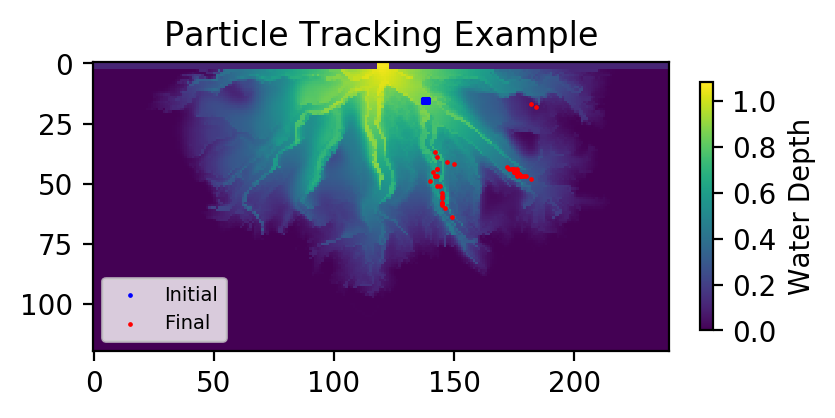

In [4]:
## Plotting of initial (blue) and final (red) particle locations
plt.figure(figsize=(4,4),dpi=200)
for k in range(0,len(start_inds)):
    plt.scatter(start_inds[k][1],start_inds[k][0],c='b',s=0.5)
    plt.scatter(end_inds[k][1],end_inds[k][0],c='r',s=0.5)
    if k == 0:
        plt.legend(['Initial','Final'], loc='lower left', fontsize=7)
plt.imshow(params.stage)
plt.title('Particle Tracking Example')
plt.colorbar(fraction=0.02, pad=0.05, label='Water Depth')
plt.show()